# Libraries & Definitions

In [1]:
"""Math & Data Libraries"""
import numpy as np
import pandas as pd
import geopandas as gpd

"""Visualization Libraries"""
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from pandas.plotting import parallel_coordinates

"""Machine Learning Libraries"""
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree

"""GIS Libraries"""
import rasterio
from rasterio.features import sieve
import xarray as xr
import rioxarray

In [2]:
#data_folder = "../Data/"

# Input Data

In [3]:
input_image = "C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\\GRANULE\\cropped_image_berlin_20m.tif"

In [4]:
rio_array = rioxarray.open_rasterio(input_image)
rio_map = rio_array.stack(z=['y','x']).transpose('z','band')
rio_map = rio_map.to_numpy()
rio_map = rio_map[:, 1:]/10000

In [5]:
rio_array.shape

(10, 2364, 2570)

In [6]:
rio_map.shape

(6075480, 9)

In [7]:
rio_map.shape[0]/2570

2364.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


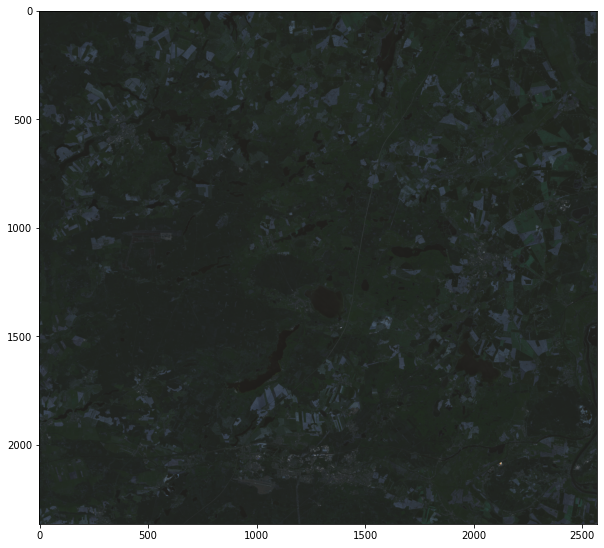

In [8]:
# Visualize map
rgb = np.zeros((2364, 2570, 3))
for i in range(3):
    rgb[:,:,i] = rio_array[i+1]/10000

plt.figure(figsize=(10,10))
plt.imshow(rgb)
plt.show()

In [9]:
df_bands = pd.read_csv("C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\GRANULE\\random_points_df.csv").reset_index().drop(["index"], axis=1)
df_metadata = pd.read_csv("C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\\GRANULE\\random_points_new.csv").reset_index().drop(["index"], axis=1)


In [10]:
df_metadata

fid Explorator          EP  tree_id       x                 y  species  \
0      SCH      SEW35  SEW35_0212    0.000   0.000   Fagus_sylvatica      9.0   
1      SCH      SEW01  SEW01_0006    9.762  21.139  Pinus_sylvestris     14.0   
2      SCH      SEW01  SEW01_0007   11.168  22.497  Pinus_sylvestris     12.6   
3      SCH      SEW01  SEW01_0009   12.167  25.581  Pinus_sylvestris     29.2   
4      SCH      SEW01  SEW01_0010   11.664  30.477  Pinus_sylvestris     17.4   
...    ...        ...         ...      ...     ...               ...      ...   
14527  SCH      SEW50  SEW50_0224    8.767  13.859   Fagus_sylvatica     68.2   
14528  SCH      SEW50  SEW50_0225    6.104  12.527   Fagus_sylvatica     12.5   
14529  SCH      SEW50  SEW50_0226    7.630  10.714   Fagus_sylvatica     65.4   
14530  SCH      SEW50  SEW50_0227    6.993   9.623   Fagus_sylvatica     15.1   
14531  SCH      SEW50  SEW50_0228   -0.386  27.558   Fagus_sylvatica      8.8   

           d       h     v  ...         bs       bb         bl    btot  \
0       9.01  0.0219  2015  ...     3.8557   0.9717    17.5336  0.0175   
1      16.10  0.1199  2016  ...    10.7823   1.8890    75.2659  0.0753   
2      15.39  0.0942  2016  ...     7.6635   1.4547    57.2625  0.0573   
3      20.13  0.6050  2016  ...   128.2867  12.9279   489.4230  0.4894   
4      17.46  0.1957  2016  ...    22.0831   3.2816   131.3384  0.1313   
...      ...     ...   ...  ...        ...      ...        ...     ...   
14527  41.09  7.8311  2015  ...  1396.8088  72.0262  5952.9302  5.9529   
14528  13.48  0.0746  2015  ...     8.5313   1.6440    50.2774  0.0503   
14529  40.54  7.0749  2015  ...  1213.7632  64.5961  5340.6217  5.3406   
14530  16.38  0.1372  2015  ...    13.9940   2.3170    90.4548  0.0905   
14531   8.95  0.0203  2015  ...     3.5740   0.9161    16.5491  0.0165   

       agb_mg  btov_ratio              gsv_m3            geometry  \
0      0.7991      0.0219    c(826271.7514784   5873436.77509811)   
1      0.6280      0.1199  c(825888.869068404   5872266.79787659)   
2      0.6083      0.0942  c(825890.275068404   5872268.15587659)   
3      0.8089      0.6050  c(825891.274068404   5872271.23987659)   
4      0.6709      0.1957  c(825890.771068404   5872276.13587658)   
...       ...         ...                 ...                 ...   
14527  0.7602      7.8311  c(820857.834457531   5887405.08305844)   
14528  0.6743      0.0746  c(820855.171457531   5887403.75105844)   
14529  0.7549      7.0749  c(820856.697457531   5887401.93805844)   
14530  0.6596      0.1372  c(820856.060457531   5887400.84705844)   
14531  0.8128      0.0203  c(820848.681457531   5887418.78205844)   

          Category   basal_area  
0      broadleaves    63.625500  
1          conifer   153.958000  
2          conifer   124.705980  
3          conifer   669.748720  
4          conifer   237.817980  
...            ...          ...  
14527  broadleaves  3653.549020  
14528  broadleaves   122.734375  
14529  broadleaves  3359.709180  
14530  broadleaves   179.101855  
14531  broadleaves    60.829120  

[14532 rows x 21 columns]

In [11]:
df_bands

blue   green     red  rededge1  rededge2  rededge3     NIR   SWIR1  \
0      0.1170  0.1305  0.1589    0.1347    0.2096    0.3191  0.3458  0.2817   
1      0.1213  0.1284  0.1430    0.1310    0.1679    0.2638  0.2963  0.2248   
2      0.1213  0.1284  0.1430    0.1310    0.1679    0.2638  0.2963  0.2248   
3      0.1213  0.1284  0.1430    0.1310    0.1679    0.2638  0.2963  0.2248   
4      0.1213  0.1284  0.1430    0.1310    0.1679    0.2638  0.2963  0.2248   
...       ...     ...     ...       ...       ...       ...     ...     ...   
14527  0.1250  0.1309  0.1625    0.1333    0.2067    0.3249  0.3516  0.2679   
14528  0.1250  0.1309  0.1625    0.1333    0.2067    0.3249  0.3516  0.2679   
14529  0.1250  0.1309  0.1625    0.1333    0.2067    0.3249  0.3516  0.2679   
14530  0.1250  0.1309  0.1625    0.1333    0.2067    0.3249  0.3516  0.2679   
14531  0.1250  0.1312  0.1634    0.1337    0.2049    0.3225  0.3380  0.2690   

        SWIR2  
0      0.1998  
1      0.1666  
2      0.1666  
3      0.1666  
4      0.1666  
...       ...  
14527  0.1909  
14528  0.1909  
14529  0.1909  
14530  0.1909  
14531  0.1913  

[14532 rows x 9 columns]

## Aggregate data

In [12]:
df_aggregated = df_bands.drop_duplicates()
df_aggregated.shape

(1319, 9)

There are 1319 unique pixels in the Berlin data

In [13]:
df_aggregated

blue   green     red  rededge1  rededge2  rededge3     NIR   SWIR1  \
0      0.1170  0.1305  0.1589    0.1347    0.2096    0.3191  0.3458  0.2817   
1      0.1213  0.1284  0.1430    0.1310    0.1679    0.2638  0.2963  0.2248   
10     0.1209  0.1296  0.1437    0.1308    0.1671    0.2704  0.2985  0.2237   
27     0.1215  0.1286  0.1408    0.1297    0.1652    0.2604  0.2948  0.2244   
82     0.1207  0.1292  0.1429    0.1302    0.1671    0.2730  0.2988  0.2248   
...       ...     ...     ...       ...       ...       ...     ...     ...   
14495  0.1250  0.1281  0.1599    0.1305    0.1961    0.3050  0.3434  0.2562   
14504  0.1250  0.1312  0.1634    0.1337    0.2049    0.3225  0.3380  0.2690   
14509  0.1252  0.1279  0.1483    0.1315    0.1908    0.2906  0.3199  0.2596   
14518  0.1255  0.1310  0.1641    0.1344    0.2061    0.3256  0.3515  0.2776   
14521  0.1257  0.1315  0.1681    0.1352    0.2215    0.3419  0.3819  0.2803   

        SWIR2  
0      0.1998  
1      0.1666  
10     0.1654  
27     0.1667  
82     0.1656  
...       ...  
14495  0.1783  
14504  0.1913  
14509  0.1856  
14518  0.1946  
14521  0.1975  

[1319 rows x 9 columns]

In [14]:
df_bands_pixel = df_bands.copy()

for i, pixel_bands in enumerate(df_aggregated.values):
    df_bands_pixel.loc[np.where(np.sum(df_bands.values==pixel_bands, axis=1)==9, True, False), ["Pixel"]] = i
df_bands_pixel

blue   green     red  rededge1  rededge2  rededge3     NIR   SWIR1  \
0      0.1170  0.1305  0.1589    0.1347    0.2096    0.3191  0.3458  0.2817   
1      0.1213  0.1284  0.1430    0.1310    0.1679    0.2638  0.2963  0.2248   
2      0.1213  0.1284  0.1430    0.1310    0.1679    0.2638  0.2963  0.2248   
3      0.1213  0.1284  0.1430    0.1310    0.1679    0.2638  0.2963  0.2248   
4      0.1213  0.1284  0.1430    0.1310    0.1679    0.2638  0.2963  0.2248   
...       ...     ...     ...       ...       ...       ...     ...     ...   
14527  0.1250  0.1309  0.1625    0.1333    0.2067    0.3249  0.3516  0.2679   
14528  0.1250  0.1309  0.1625    0.1333    0.2067    0.3249  0.3516  0.2679   
14529  0.1250  0.1309  0.1625    0.1333    0.2067    0.3249  0.3516  0.2679   
14530  0.1250  0.1309  0.1625    0.1333    0.2067    0.3249  0.3516  0.2679   
14531  0.1250  0.1312  0.1634    0.1337    0.2049    0.3225  0.3380  0.2690   

        SWIR2   Pixel  
0      0.1998     0.0  
1      0.1666     1.0  
2      0.1666     1.0  
3      0.1666     1.0  
4      0.1666     1.0  
...       ...     ...  
14527  0.1909  1285.0  
14528  0.1909  1285.0  
14529  0.1909  1285.0  
14530  0.1909  1285.0  
14531  0.1913  1315.0  

[14532 rows x 10 columns]

In [15]:
df_metadata_pixel = df_metadata.copy()
df_metadata_pixel["Pixel"] = df_bands_pixel["Pixel"]
df_metadata_pixel

fid Explorator          EP  tree_id       x                 y  species  \
0      SCH      SEW35  SEW35_0212    0.000   0.000   Fagus_sylvatica      9.0   
1      SCH      SEW01  SEW01_0006    9.762  21.139  Pinus_sylvestris     14.0   
2      SCH      SEW01  SEW01_0007   11.168  22.497  Pinus_sylvestris     12.6   
3      SCH      SEW01  SEW01_0009   12.167  25.581  Pinus_sylvestris     29.2   
4      SCH      SEW01  SEW01_0010   11.664  30.477  Pinus_sylvestris     17.4   
...    ...        ...         ...      ...     ...               ...      ...   
14527  SCH      SEW50  SEW50_0224    8.767  13.859   Fagus_sylvatica     68.2   
14528  SCH      SEW50  SEW50_0225    6.104  12.527   Fagus_sylvatica     12.5   
14529  SCH      SEW50  SEW50_0226    7.630  10.714   Fagus_sylvatica     65.4   
14530  SCH      SEW50  SEW50_0227    6.993   9.623   Fagus_sylvatica     15.1   
14531  SCH      SEW50  SEW50_0228   -0.386  27.558   Fagus_sylvatica      8.8   

           d       h     v  ...       bb         bl    btot  agb_mg  \
0       9.01  0.0219  2015  ...   0.9717    17.5336  0.0175  0.7991   
1      16.10  0.1199  2016  ...   1.8890    75.2659  0.0753  0.6280   
2      15.39  0.0942  2016  ...   1.4547    57.2625  0.0573  0.6083   
3      20.13  0.6050  2016  ...  12.9279   489.4230  0.4894  0.8089   
4      17.46  0.1957  2016  ...   3.2816   131.3384  0.1313  0.6709   
...      ...     ...   ...  ...      ...        ...     ...     ...   
14527  41.09  7.8311  2015  ...  72.0262  5952.9302  5.9529  0.7602   
14528  13.48  0.0746  2015  ...   1.6440    50.2774  0.0503  0.6743   
14529  40.54  7.0749  2015  ...  64.5961  5340.6217  5.3406  0.7549   
14530  16.38  0.1372  2015  ...   2.3170    90.4548  0.0905  0.6596   
14531   8.95  0.0203  2015  ...   0.9161    16.5491  0.0165  0.8128   

       btov_ratio              gsv_m3            geometry     Category  \
0          0.0219    c(826271.7514784   5873436.77509811)  broadleaves   
1          0.1199  c(825888.869068404   5872266.79787659)      conifer   
2          0.0942  c(825890.275068404   5872268.15587659)      conifer   
3          0.6050  c(825891.274068404   5872271.23987659)      conifer   
4          0.1957  c(825890.771068404   5872276.13587658)      conifer   
...           ...                 ...                 ...          ...   
14527      7.8311  c(820857.834457531   5887405.08305844)  broadleaves   
14528      0.0746  c(820855.171457531   5887403.75105844)  broadleaves   
14529      7.0749  c(820856.697457531   5887401.93805844)  broadleaves   
14530      0.1372  c(820856.060457531   5887400.84705844)  broadleaves   
14531      0.0203  c(820848.681457531   5887418.78205844)  broadleaves   

        basal_area   Pixel  
0        63.625500     0.0  
1       153.958000     1.0  
2       124.705980     1.0  
3       669.748720     1.0  
4       237.817980     1.0  
...            ...     ...  
14527  3653.549020  1285.0  
14528   122.734375  1285.0  
14529  3359.709180  1285.0  
14530   179.101855  1285.0  
14531    60.829120  1315.0  

[14532 rows x 22 columns]

In [16]:
average_btot = np.zeros(df_aggregated.shape[0])
average_basal_area = np.zeros(df_aggregated.shape[0])

for pixel_i in np.arange(df_aggregated.shape[0]):
    subset_df = df_metadata_pixel[df_metadata_pixel["Pixel"]==pixel_i]#["category"].value_counts(normalize = True)
    average_btot[pixel_i] = np.mean(subset_df["btot"].values)
    average_basal_area[pixel_i] = np.mean(subset_df["basal_area"].values)

In [15]:
average_btot = np.zeros(df_aggregated.shape[0])
average_basal_area = np.zeros(df_aggregated.shape[0])

for pixel_i in np.arange(df_aggregated.shape[0]):
    subset_df = df_metadata_pixel[df_metadata_pixel["Pixel"]==pixel_i]#["category"].value_counts(normalize = True)
    average_btot[pixel_i] = np.sum(subset_df["btot"].values)
    average_basal_area[pixel_i] = np.sum(subset_df["basal_area"].values)

In [17]:
len(average_btot), len(average_basal_area)

(1319, 1319)

In [18]:
df_aggregated["Pixel"] = np.arange(df_aggregated.shape[0])
df_aggregated["Average btot"] = average_btot
df_aggregated["Average basal_area"] = average_basal_area

<ipython-input-18-fd80d551c714>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aggregated["Pixel"] = np.arange(df_aggregated.shape[0])
<ipython-input-18-fd80d551c714>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aggregated["Average btot"] = average_btot
<ipython-input-18-fd80d551c714>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [19]:
df_aggregated

blue   green     red  rededge1  rededge2  rededge3     NIR   SWIR1  \
0      0.1170  0.1305  0.1589    0.1347    0.2096    0.3191  0.3458  0.2817   
1      0.1213  0.1284  0.1430    0.1310    0.1679    0.2638  0.2963  0.2248   
10     0.1209  0.1296  0.1437    0.1308    0.1671    0.2704  0.2985  0.2237   
27     0.1215  0.1286  0.1408    0.1297    0.1652    0.2604  0.2948  0.2244   
82     0.1207  0.1292  0.1429    0.1302    0.1671    0.2730  0.2988  0.2248   
...       ...     ...     ...       ...       ...       ...     ...     ...   
14495  0.1250  0.1281  0.1599    0.1305    0.1961    0.3050  0.3434  0.2562   
14504  0.1250  0.1312  0.1634    0.1337    0.2049    0.3225  0.3380  0.2690   
14509  0.1252  0.1279  0.1483    0.1315    0.1908    0.2906  0.3199  0.2596   
14518  0.1255  0.1310  0.1641    0.1344    0.2061    0.3256  0.3515  0.2776   
14521  0.1257  0.1315  0.1681    0.1352    0.2215    0.3419  0.3819  0.2803   

        SWIR2  Pixel  Average btot  Average basal_area  
0      0.1998      0      0.866200          783.684186  
1      0.1666      1      0.195771          317.122060  
10     0.1654      2      0.241929          375.562811  
27     0.1667      3      0.215589          339.287748  
82     0.1656      4      0.221730          352.659455  
...       ...    ...           ...                 ...  
14495  0.1783   1314      2.443767         1722.030703  
14504  0.1913   1315      3.006350         1942.195880  
14509  0.1856   1316      2.922750         2100.949358  
14518  0.1946   1317      3.424500         2375.302252  
14521  0.1975   1318      2.373600         1802.259055  

[1319 rows x 12 columns]

In [20]:
#X = df_aggregated.values[:, :9]
#y = df_aggregated["Average btot"].values

In [21]:
X = df_aggregated.values[:, :9]
y = df_aggregated["Average basal_area"].values

In [22]:
print(X.shape)
print(y.shape)

(1319, 9)
(1319,)


In [23]:
df_aggregated["Average basal_area"]

0         783.684186
1         317.122060
10        375.562811
27        339.287748
82        352.659455
            ...     
14495    1722.030703
14504    1942.195880
14509    2100.949358
14518    2375.302252
14521    1802.259055
Name: Average basal_area, Length: 1319, dtype: float64

In [24]:
np.linspace(0, 160, 160).reshape(-1, 1)#.shape

array([[  0.        ],
       [  1.00628931],
       [  2.01257862],
       [  3.01886792],
       [  4.02515723],
       [  5.03144654],
       [  6.03773585],
       [  7.04402516],
       [  8.05031447],
       [  9.05660377],
       [ 10.06289308],
       [ 11.06918239],
       [ 12.0754717 ],
       [ 13.08176101],
       [ 14.08805031],
       [ 15.09433962],
       [ 16.10062893],
       [ 17.10691824],
       [ 18.11320755],
       [ 19.11949686],
       [ 20.12578616],
       [ 21.13207547],
       [ 22.13836478],
       [ 23.14465409],
       [ 24.1509434 ],
       [ 25.1572327 ],
       [ 26.16352201],
       [ 27.16981132],
       [ 28.17610063],
       [ 29.18238994],
       [ 30.18867925],
       [ 31.19496855],
       [ 32.20125786],
       [ 33.20754717],
       [ 34.21383648],
       [ 35.22012579],
       [ 36.22641509],
       [ 37.2327044 ],
       [ 38.23899371],
       [ 39.24528302],
       [ 40.25157233],
       [ 41.25786164],
       [ 42.26415094],
       [ 43

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(df_aggregated["Average btot"].values.reshape(-1, 1), df_aggregated["Average basal_area"])

reg.predict(np.linspace(0, 160).reshape(-1, 1))

array([  345.87588884,  2251.475954  ,  4157.07601915,  6062.6760843 ,
        7968.27614946,  9873.87621461, 11779.47627976, 13685.07634491,
       15590.67641007, 17496.27647522, 19401.87654037, 21307.47660553,
       23213.07667068, 25118.67673583, 27024.27680099, 28929.87686614,
       30835.47693129, 32741.07699645, 34646.6770616 , 36552.27712675,
       38457.87719191, 40363.47725706, 42269.07732221, 44174.67738736,
       46080.27745252, 47985.87751767, 49891.47758282, 51797.07764798,
       53702.67771313, 55608.27777828, 57513.87784344, 59419.47790859,
       61325.07797374, 63230.6780389 , 65136.27810405, 67041.8781692 ,
       68947.47823436, 70853.07829951, 72758.67836466, 74664.27842981,
       76569.87849497, 78475.47856012, 80381.07862527, 82286.67869043,
       84192.27875558, 86097.87882073, 88003.47888589, 89909.07895104,
       91814.67901619, 93720.27908135])

In [26]:
reg.intercept_

345.8758888427127

In [27]:
df_aggregated["Average basal_area"].shape

(1319,)

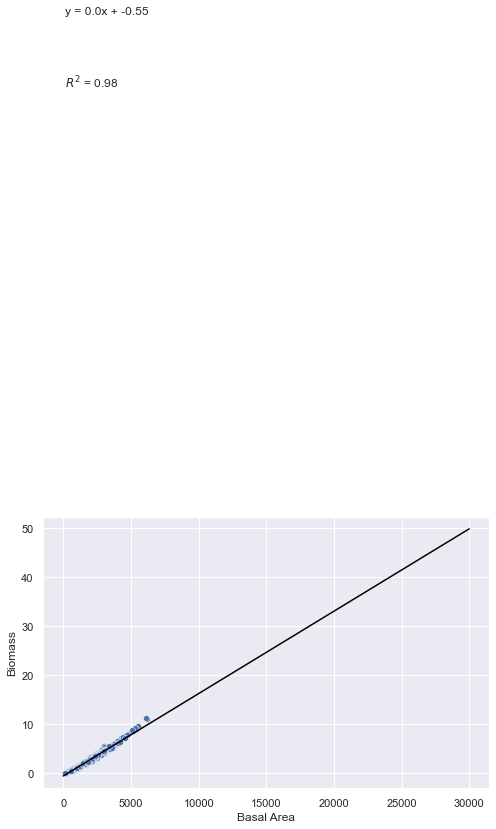

In [28]:
reg = LinearRegression(fit_intercept = True).fit(df_aggregated["Average basal_area"].values.reshape(-1, 1), df_aggregated["Average btot"])
score = reg.score(df_aggregated["Average basal_area"].values.reshape(-1, 1), df_aggregated["Average btot"])

sns.set_theme()
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(np.linspace(0, 30000), reg.predict(np.linspace(0, 30000).reshape(-1, 1)), color='black')
plt.text(100, 155, f"y = {np.round(reg.coef_[0], 2)}x + {np.round(reg.intercept_, 2)}")
plt.text(100, 140, f"$R^2$ = {np.round(score, 2)}")

sns.scatterplot(data=df_aggregated, x="Average basal_area", y="Average btot")
plt.xlabel("Basal Area")
plt.ylabel("Biomass")
plt.show()
sns.set_theme(style="white")

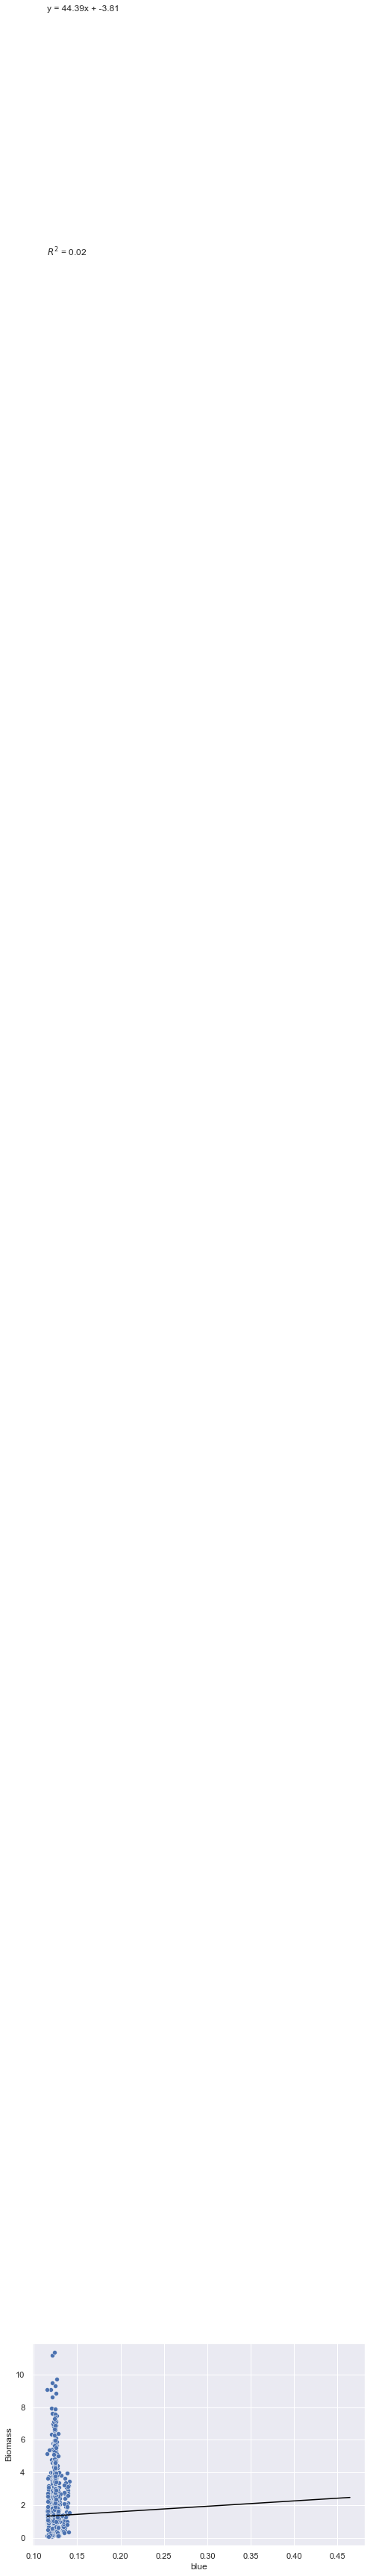

In [29]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept = True).fit(df_aggregated["blue"].values.reshape(-1, 1), df_aggregated["Average btot"])
score = reg.score(df_aggregated["blue"].values.reshape(-1, 1), df_aggregated["Average btot"])

sns.set_theme()
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(np.linspace(np.min(df_aggregated["blue"].values),np.max(df_aggregated["NIR"].values)), reg.predict(np.linspace(np.min(df_aggregated["blue"].values),np.max(df_aggregated["blue"].values)).reshape(-1, 1)), color='black')
plt.text(0.115, 155, f"y = {np.round(reg.coef_[0], 2)}x + {np.round(reg.intercept_, 2)}")
plt.text(0.115, 140, f"$R^2$ = {np.round(score, 2)}")

sns.scatterplot(data=df_aggregated, x="blue", y="Average btot")
plt.xlabel("blue")
plt.ylabel("Biomass")
plt.show()
sns.set_theme(style="white")

Plot spectral signature of training data

In [30]:
# df_train = pd.DataFrame(X, columns = ['B02','B03','B04','B05','B06','B07','B8A','B11','B12'])

# df_y = pd.DataFrame(y, columns = ['CLASS'])
# df_dataset = pd.concat([df_y, df_train], axis=1)

# df_mean = df_dataset.groupby('CLASS').mean()
# df_mean["CLASS"] = df_mean.index

# df_map = pd.DataFrame(rio_map, columns = ['B02','B03','B04','B05','B06','B07','B8A','B11','B12'])

# plt.figure(figsize=(8,5))
# parallel_coordinates(df_mean, "CLASS", color=("#e6004d", "#f2a64d", "#ffd24d", "#e6e64d","#80ff00","#00a600", "#80f2e6"))
# plt.plot(df_map.mean(), color = "#00a600", label = "Map")
# plt.fill_between(np.arange(9), df_map.mean()-df_map.std(), df_map.mean()+df_map.std(), color = "#00a600", alpha = 0.3)
# plt.legend()

## Preprocess Data

### Split into Training and Test set

In [31]:
# We split the data into a training set (80%) and a test (or validation) set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize Data

In [32]:
X_train_norm = X_train
X_test_norm = X_test
rio_map_norm = rio_map

In [33]:
# # Standardize features by removing the mean and divide through the standard deviation
# scaler = StandardScaler()
# X_train_norm = scaler.fit_transform(X_train)
# X_test_norm = scaler.transform(X_test)

# rio_map_norm = scaler.transform(rio_map)

In [34]:
print(X_train_norm.shape)
print(y_train.shape)

(1055, 9)
(1055,)


### Balance Dataset

In [35]:
# # Summarize class distribution
# df_y = pd.DataFrame(y_train, columns = ['Class'])
# df_y.groupby(["Class"])["Class"].count().reset_index(name="count")

In [36]:
#sm = SMOTE(sampling_strategy='auto', 
#            k_neighbors=8, 
#            random_state=100)

#X_train_norm_smote, y_train_smote = sm.fit_resample(X_train_norm, y_train.ravel())

X_train_norm_smote, y_train_smote = X_train_norm, y_train

In [37]:
# # Summarize class distribution
# df_y = pd.DataFrame(y_train_smote, columns = ['Class'])
# df_y.groupby(["Class"])["Class"].count().reset_index(name="count")

### Remove outliers

In [38]:
# lof = LocalOutlierFactor()
# yhat = lof.fit_predict(X_train_norm_smote)

# mask = yhat != -1
# X_train_norm_smote, y_train_smote = X_train_norm_smote[mask, :], y_train_smote[mask]

# # Summarize class distribution
# df_y = pd.DataFrame(y_train_smote, columns = ['Class'])
# df_y.groupby(["Class"])["Class"].count().reset_index(name="count")

# Model Training

### Hyperparameter Tuning (Calibration)

In [39]:
%%time
rfc=RandomForestRegressor(random_state=12345)

parameter_space = { 
    'n_estimators': [64, 128],
#    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2, 4, 8, 16, 36],
}

CV_rfc = GridSearchCV(rfc,
                      parameter_space,
                      n_jobs = -1,
                      cv = 3)

CV_rfc.fit(X_train_norm_smote, y_train_smote)

print("Best: %f using %s \n" % (CV_rfc.best_score_, CV_rfc.best_params_))
means = CV_rfc.cv_results_['mean_test_score']
stds = CV_rfc.cv_results_['std_test_score']
params = CV_rfc.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))   

Best: 0.357097 using {'max_depth': 36, 'n_estimators': 128} 

0.250961 (0.045380) with: {'max_depth': 2, 'n_estimators': 64}
0.250763 (0.046101) with: {'max_depth': 2, 'n_estimators': 128}
0.311683 (0.050511) with: {'max_depth': 4, 'n_estimators': 64}
0.314294 (0.049872) with: {'max_depth': 4, 'n_estimators': 128}
0.351116 (0.064058) with: {'max_depth': 8, 'n_estimators': 64}
0.351282 (0.064472) with: {'max_depth': 8, 'n_estimators': 128}
0.354456 (0.076124) with: {'max_depth': 16, 'n_estimators': 64}
0.356457 (0.077765) with: {'max_depth': 16, 'n_estimators': 128}
0.351244 (0.072117) with: {'max_depth': 36, 'n_estimators': 64}
0.357097 (0.073795) with: {'max_depth': 36, 'n_estimators': 128}
Wall time: 6.82 s


In [40]:
rf_clf = RandomForestRegressor(random_state=12345,
                        max_features = 'sqrt',        
                        n_estimators = CV_rfc.best_params_["n_estimators"],
                        max_depth = CV_rfc.best_params_["max_depth"])
                     
rf_clf.fit(X_train_norm_smote, y_train_smote)

RandomForestRegressor(max_depth=36, max_features='sqrt', n_estimators=128,
                      random_state=12345)

#### Visualize a tree from the forest with the best parameter settings

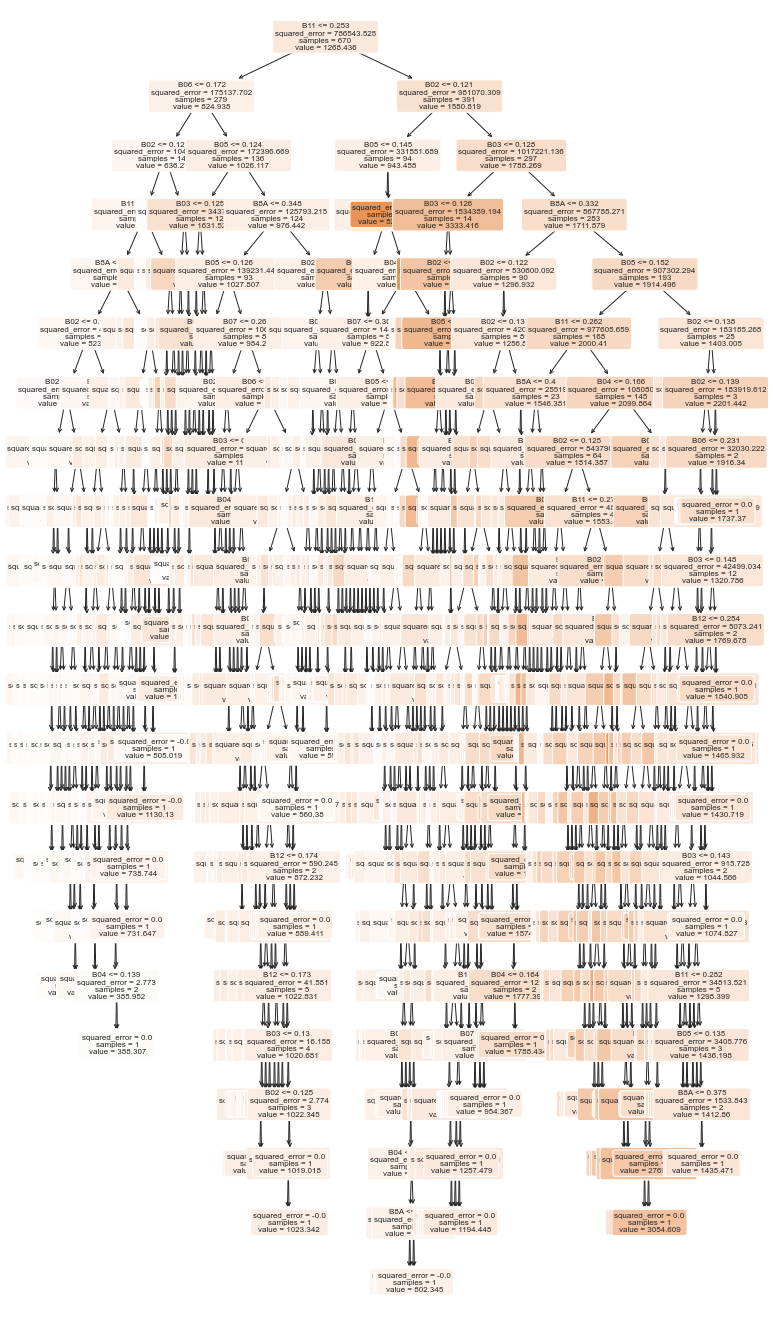

In [41]:
# for a monthly acquisition with 10 original bands:
features = ['B02','B03','B04','B05','B06','B07','B8A','B11','B12']

# classes = ["Broadleaf", "Conifer"]

k = 3  # index of a decision tree
plt.figure(figsize=(12,24))
tree.plot_tree(CV_rfc.best_estimator_.estimators_[k],
                   feature_names = features,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
plt.savefig("C:\\Users\\magai\\Desktop\\master thesis\\plots from python\\berlin\\basal area sum\\output_plot.png")
plt.show()

#### Plotting feature importance values

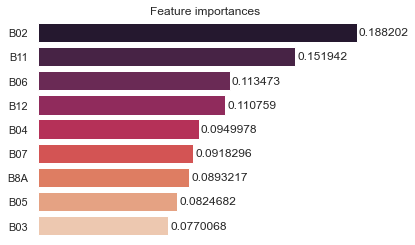

In [42]:
features_df = pd.DataFrame({'features': features, 'importances': rf_clf.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

## Classification

### Performance Evaluation

In [43]:
# from sklearn.metrics import classification_report

# y_pred_train = rf_clf.predict(X_train_norm_smote)
# print("Training set")
# print(classification_report(y_train_smote, y_pred_train))
# print()

# y_pred_test = rf_clf.predict(X_test_norm)
# print("Test set")
# print(classification_report(y_test, y_pred_test))
# print()

In [44]:
# from sklearn.metrics import confusion_matrix

# conf_matrix = confusion_matrix(y_train_smote, y_pred_train, normalize = "true")
# sns.heatmap(conf_matrix,
#             annot=True,
#             fmt='.2f',
#             xticklabels=classes,
#             yticklabels=classes,
#     )
# plt.ylabel('Prediction',fontsize=13)
# plt.xlabel('Actual',fontsize=13)
# plt.title('Training Set Confusion Matrix',fontsize=17)
# plt.show()

# conf_matrix = confusion_matrix(y_test, y_pred_test, normalize = "true")
# sns.heatmap(conf_matrix,
#             annot=True,
#             fmt='.2f',
#             xticklabels=classes,
#             yticklabels=classes,
#     )
# plt.ylabel('Prediction',fontsize=13)
# plt.xlabel('Actual',fontsize=13)
# plt.title('Training Set Confusion Matrix',fontsize=17)
# plt.show()

In [45]:
from sklearn.metrics import mean_squared_error


y_pred_train = rf_clf.predict(X_train_norm_smote)
print("Training set")
print(mean_squared_error(y_train_smote, y_pred_train))
print()

y_pred_test = rf_clf.predict(X_test_norm)
print("Test set")
print(mean_squared_error(y_test, y_pred_test))
print()

Training set
67054.07010001395

Test set
525417.5324793736



In [77]:
np.mean(y_test)**2

1765236.3361768578

In [46]:
y_test[:5]

array([ 668.09406425, 1082.30341929,  551.15599711,  373.66269152,
       2097.73011667])

In [47]:
y_pred_test[:5]

array([ 952.35502562, 1824.80630368, 1181.35875688,  868.81626409,
        887.89751054])

In [48]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# def calculate_scores(y_test, y_pred, average = "binary"):
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average = average)
#     recall = recall_score(y_test, y_pred, average = average)
#     f1 = f1_score(y_test, y_pred, average = average)
#     return [accuracy, precision, recall, f1]

In [49]:
# # y_test[y_test=="conifer"] = 1
# # y_test[y_test=="broadleaves"] = 0

# # y_pred_test[y_pred_test=="conifer"] = 1
# # y_pred_test[y_pred_test=="broadleaves"] = 0

# y_test = y_test.astype(int)
# y_pred_test = y_pred_test.astype(int)

# # results = calculate_scores(y_test, y_pred_test)

In [50]:
# sns.set_theme()
# fig, ax = plt.subplots(figsize = (8,5))
# sns.barplot(y = results, x = ["Accuracy", "Precision", "Recall", "F1-Score"])

# for p in ax.patches:
#     h, w, x = p.get_height(), p.get_width(), p.get_x()
#     xy = (x + w / 2., h-0.1)
#     text = f'{h:0.2f}'
#     ax.annotate(text=text, xy=xy, ha='center', va='center')
    
# plt.title("Berlin  Classification Performance", fontsize = 20)
# plt.xlabel("Metric", fontsize = 14)
# plt.ylabel("Score", fontsize = 14)
# plt.ylim(0,1)
# plt.show()

# sns.set_theme(style="white")

### Map Classification

In [51]:
map_predictions = rf_clf.predict(rio_map_norm)
classified_map = map_predictions.reshape(rio_array.shape[1:3])
classified_map

array([[1196.38639036, 1188.9892514 , 1235.35633487, ..., 1334.90428818,
        1351.28473024, 1387.00764312],
       [1148.73683644, 1118.92222417, 1232.52763214, ..., 1379.51190017,
        1415.46725277, 1412.16805574],
       [1121.67265611, 1136.34077211, 1185.05481084, ..., 1359.50815641,
        1353.63777465, 1359.50815641],
       ...,
       [1481.24638511, 1469.34616416, 1707.7701236 , ..., 1941.64450714,
        1960.21394668, 1917.25564856],
       [1896.31023093, 1750.06668392, 1803.36672017, ..., 1920.32794975,
        1951.41105427, 1942.17992782],
       [1799.00394928, 1745.5942075 , 1803.36672017, ..., 1965.76335273,
        2017.89851125, 2017.89851125]])

In [52]:
classified_map.shape

(2364, 2570)

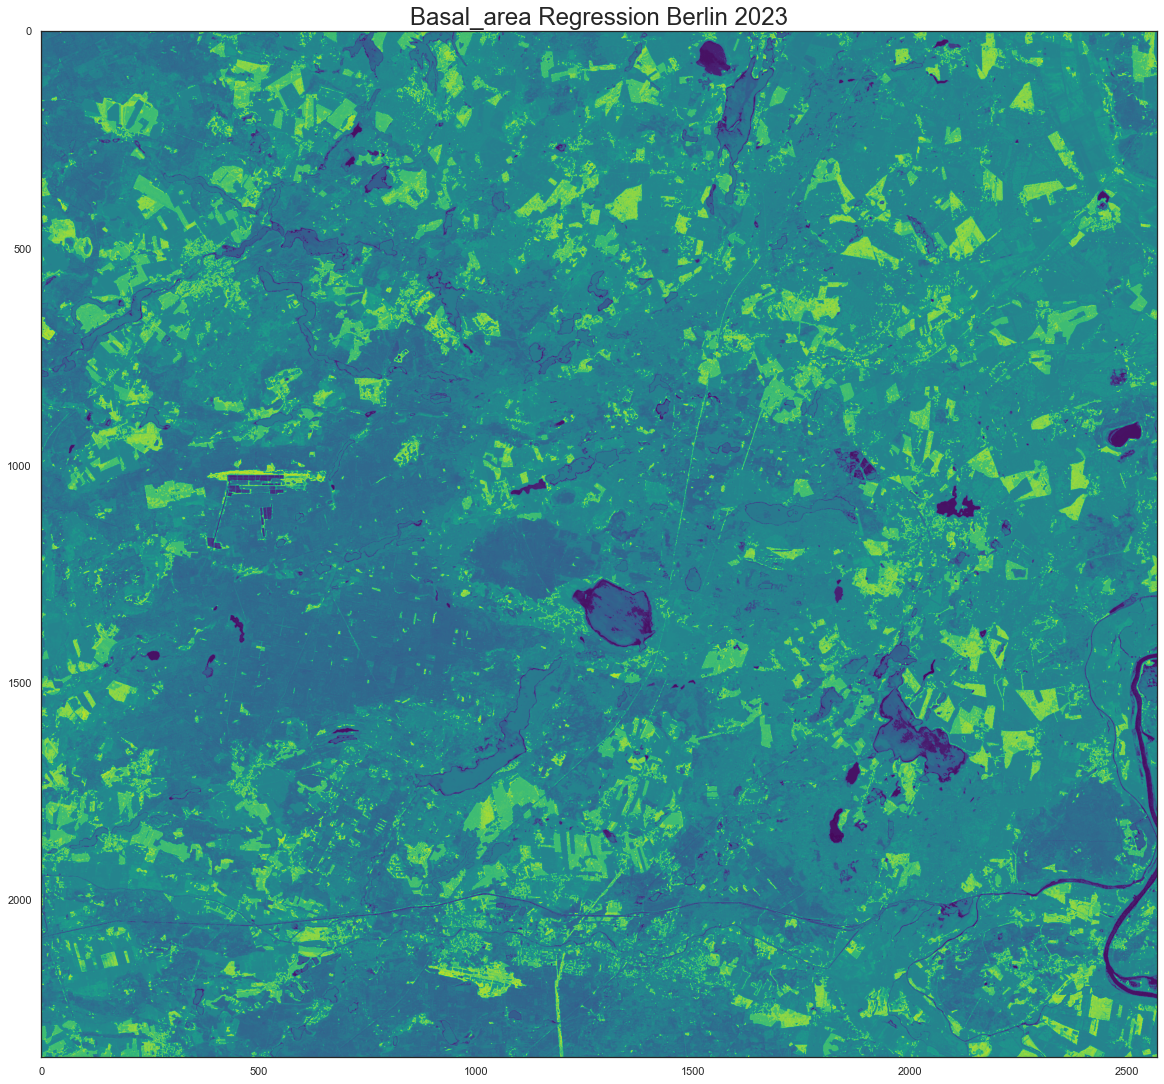

In [53]:
fig, ax = plt.subplots(figsize=(20, 20))

chm_plot = ax.imshow(classified_map,
                     cmap = "viridis")

ax.set_title("Basal_area Regression Berlin 2023", fontsize=24)

# ax.set_axis_off()
plt.show()

In [54]:
# classified_map[classified_map=="conifer"] = 2
# classified_map[classified_map=="broadleaves"] = 1

In [55]:
classified_map = classified_map.astype(rasterio.uint16)
sieved = sieve(classified_map, size=4, connectivity=8)
sieved.shape

(2364, 2570)

In [56]:
np.unique(sieved, return_counts = True)

(array([ 432,  433,  434, ..., 2418, 2419, 2427], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

### Save Map

In [57]:
# Define the CRS information for your image
from rasterio.crs import CRS
# Open the cropped image to get the spatial information
with rasterio.open("C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\\GRANULE\\cropped_image_berlin_20m.tif") as src:
    # Retrieve the geotransform and coordinate reference system
    transform = src.transform
    crs = src.crs

    # Define the output path for the TIFF image
    output_path = "C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\\GRANULE\\Berlin_Regression_Basal_area_Test.tif"

    # Open a new raster file in write mode
    with rasterio.open(output_path, 'w', driver='GTiff', width=classified_map.shape[1], height=classified_map.shape[0], count=1, dtype=classified_map.dtype, crs=crs, transform=transform) as dst:
        # Write the image data to the file
        dst.write(classified_map, 1)

# Forest Mask

In [58]:
df_forest_mask = gpd.read_file("C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\\GRANULE\\Berlin_Forest_Mask.shp")

In [59]:
df_forest_mask

ID LAND              MODELLART OBJART OBJART_TXT             OBJID  \
0      0   BB  Basis-DLM#DTK10#DTK25  43002    AX_Wald  DEBBATP000000REw   
1      0   BB  Basis-DLM#DTK10#DTK25  43002    AX_Wald  DEBBATP000000PWP   
2      0   BB  Basis-DLM#DTK10#DTK25  43002    AX_Wald  DEBBATP000000PcF   
3      0   BB  Basis-DLM#DTK10#DTK25  43002    AX_Wald  DEBBATP000000PYK   
4      0   BB  Basis-DLM#DTK10#DTK25  43002    AX_Wald  DEBBATP000000RU3   
...   ..  ...                    ...    ...        ...               ...   
7422   0   BB  Basis-DLM#DTK10#DTK25  43002    AX_Wald  DEBBATP100001eQG   
7423   0   BB  Basis-DLM#DTK10#DTK25  43002    AX_Wald  DEBBATP100001f3t   
7424   0   BB  Basis-DLM#DTK10#DTK25  43002    AX_Wald  DEBBATP100001f4g   
7425   0   BB  Basis-DLM#DTK10#DTK25  43002    AX_Wald  DEBBATP100001f47   
7426   0   BB  Basis-DLM#DTK10#DTK25  43002    AX_Wald  DEBBATP100001f4l   

      HDU_X                BEGINN  ENDE   BEZ   NAM   VEG   ZUS  \
0         0  2018-07-25T09:11:21Z  None  None  None  1200  None   
1         0  2019-03-27T14:43:23Z  None  None  None  1200  None   
2         0  2019-03-27T14:43:23Z  None  None  None  1100  None   
3         0  2019-03-27T14:43:23Z  None  None  None  1100  None   
4         0  2012-06-19T11:40:57Z  None  None  None  1300  None   
...     ...                   ...   ...   ...   ...   ...   ...   
7422      0  2019-09-13T05:13:10Z  None  None  None  1300  None   
7423      0  2019-09-20T09:37:52Z  None  None  None  1300  None   
7424      0  2019-09-20T05:17:31Z  None  None  None  1300  None   
7425      0  2019-09-20T09:37:52Z  None  None  None  1300  None   
7426      0  2019-09-20T09:37:52Z  None  None  None  1300  None   

                                               geometry  
0     POLYGON ((411910.000 5884604.400, 411724.800 5...  
1     POLYGON ((409974.360 5887946.895, 409917.156 5...  
2     POLYGON ((409810.073 5890735.263, 409799.329 5...  
3     POLYGON ((406622.812 5888289.615, 406630.100 5...  
4     POLYGON ((415945.961 5885115.482, 415953.100 5...  
...                                                 ...  
7422  POLYGON ((413806.124 5870214.443, 413790.374 5...  
7423  POLYGON ((429375.703 5857611.119, 429377.489 5...  
7424  POLYGON ((427750.974 5858157.375, 427689.200 5...  
7425  POLYGON ((429125.700 5857972.000, 429147.500 5...  
7426  POLYGON ((429759.097 5858472.588, 429786.084 5...  

[7427 rows x 14 columns]

<AxesSubplot:>

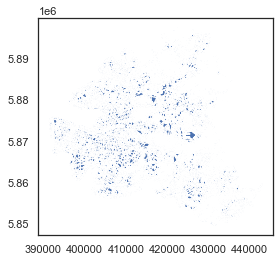

In [60]:
df_forest_mask.plot()

In [61]:
from shapely.ops import cascaded_union

boundary = gpd.GeoSeries(cascaded_union(df_forest_mask.geometry))

<ipython-input-61-e7be87d00f19>:3: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  boundary = gpd.GeoSeries(cascaded_union(df_forest_mask.geometry))


<AxesSubplot:>

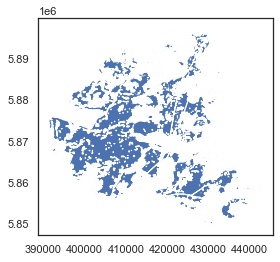

In [62]:
boundary.plot()

In [63]:
# Define the CRS information for your image
from rasterio.crs import CRS
# Open the cropped image to get the spatial information
with rasterio.open("C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\\GRANULE\\Berlin_Regression_Basal_area_Test.tif") as src:
    # Retrieve the geotransform and coordinate reference system
    transform = src.transform
    crs = src.crs
    boundary.crs = src.crs
    from rasterio.mask import mask

    out, _ = mask(src, boundary.geometry, invert=False)

    # Define the output path for the TIFF image
    output_path = "C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\\GRANULE\\Berlin_Regression_Basal_area_Masked_Test.tif"

    # Open a new raster file in write mode
    with rasterio.open(output_path, 'w', driver='GTiff', width=classified_map.shape[1], height=classified_map.shape[0], count=1, dtype=classified_map.dtype, crs=crs, transform=transform) as dst:
        # Write the image data to the file
        dst.write(out)

In [64]:
np.unique(out[0], return_counts=True)

(array([   0,  461,  479, ..., 2353, 2356, 2360], dtype=uint16),
 array([4338173,       1,       1, ...,       1,       3,       1],
       dtype=int64))

In [65]:
np.unique(sieved, return_counts=True)

(array([ 432,  433,  434, ..., 2418, 2419, 2427], dtype=uint16),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

Raster CRS: EPSG:32633
Polygon CRS: epsg:32633


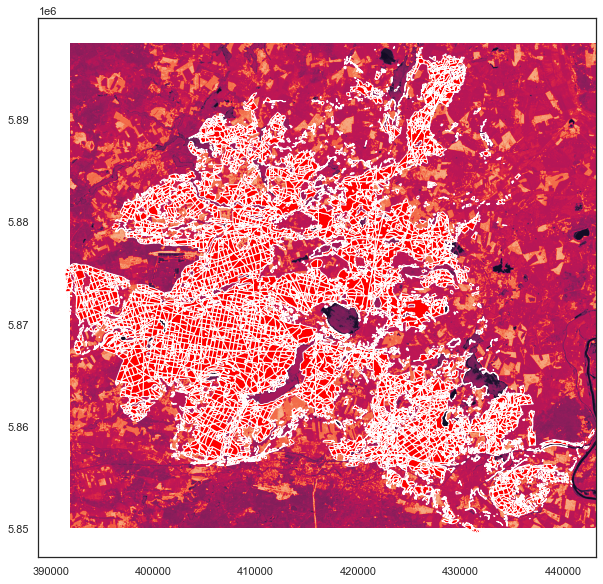

In [66]:
import rasterio.plot as rp

fig, ax = plt.subplots(figsize=(10, 10))
with rasterio.open("C:\\Users\\magai\\Desktop\\master thesis\\sentinell2\\S2B_MSIL2A_20230508T100559_N0509_R022_T33UVU_20230508T131238.Berlin\\GRANULE\\Berlin_Regression_Basal_area_Test.tif") as src:
    rp.show(src, ax=ax)
    print("Raster CRS:", src.crs)
    print("Polygon CRS:", df_forest_mask.crs)
df_forest_mask.plot(ax=ax, facecolor='red')
plt.show()

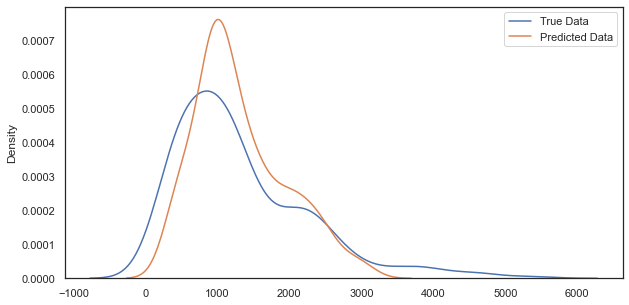

In [67]:
plt.figure(figsize=(10,5))
sns.kdeplot(y_test, label = "True Data")
sns.kdeplot(y_pred_test, label = "Predicted Data")
plt.legend()
plt.show()

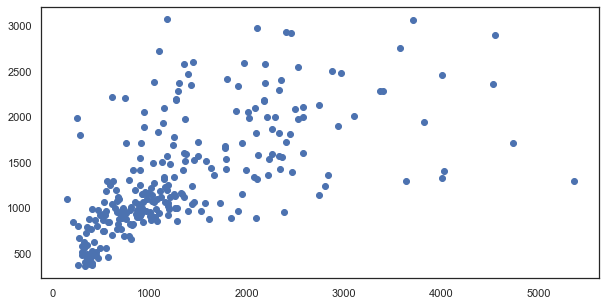

In [68]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_test)
plt.show()

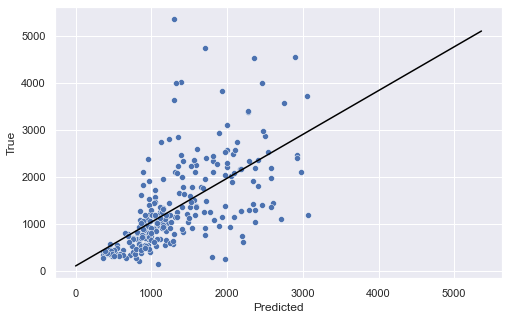

In [72]:
from sklearn.linear_model import LinearRegression

df_results = pd.DataFrame()
df_results["True"] = y_test
df_results["Predicted"] = y_pred_test

reg = LinearRegression(fit_intercept = True).fit(df_results["Predicted"].values.reshape(-1, 1), df_results["True"])
score = reg.score(df_results["Predicted"].values.reshape(-1, 1), df_results["True"])

sns.set_theme()
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(np.linspace(0, np.max(df_results["True"])), reg.predict(np.linspace(0, np.max(df_results["True"])).reshape(-1, 1)), color='black')
# plt.text(100, 155, f"y = {np.round(reg.coef_[0], 2)}x + {np.round(reg.intercept_, 2)}")
# plt.text(100, 140, f"$R^2$ = {np.round(score, 2)}")

sns.scatterplot(data=df_results, x="Predicted", y="True")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
sns.set_theme(style="white")

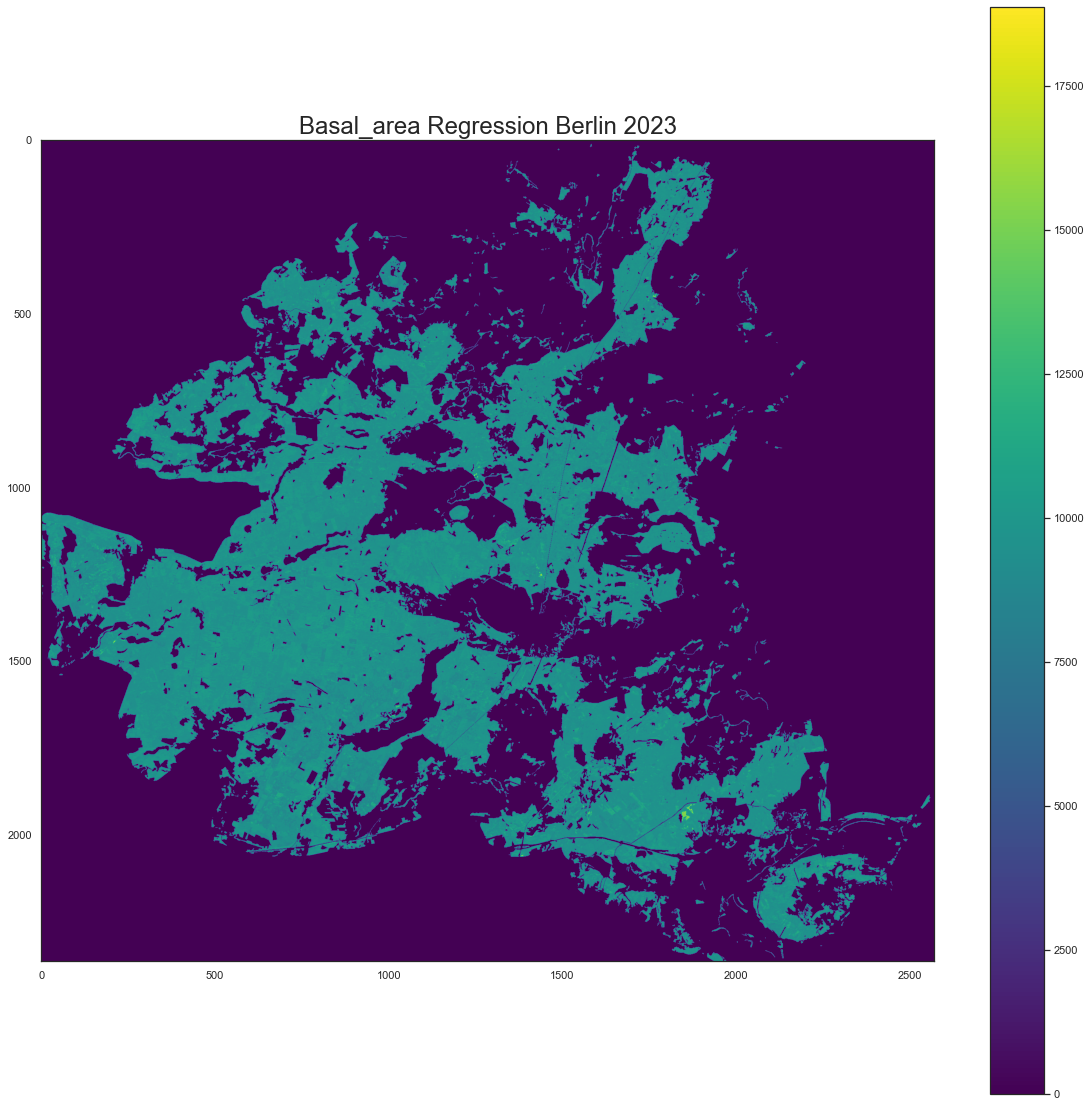

In [67]:
fig, ax = plt.subplots(figsize=(20, 20))

plt.imshow(out[0], cmap = "viridis")

ax.set_title("Basal_area Regression Berlin 2023", fontsize=24)
plt.colorbar()
# ax.set_axis_off()
plt.show()